<a href="https://colab.research.google.com/github/vignesh-madanan/fashion_mnist/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FASHION MNIST
 - 60,000 images to train the network
 - 10,000 images to evaluate the classification 

In [3]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

- The images are 28x28 NumPy arrays, andpixel values range form 0 to 255
-  the classes of the image are given below

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
#####################TRAINING DATA INFO#################

#There are 60K imageson the train dataset
# There are 60K test labels for each one of them
# Each label is an integer between 0 and 9:
print("Image Shape",train_images.shape)
print("Number of Labels", len(train_labels))
print("Train labels numbering",train_labels)

Image Shape (60000, 28, 28)
Number of Labels 60000
Train labels numbering [9 0 0 ... 3 0 5]


In [12]:
#####################TESTING DATA INFO#################

#There are 60K imageson the train dataset
# There are 60K test labels for each one of them
# Each label is an integer between 0 and 9:
print("Image Shape",test_images.shape)
print("Number of Labels", len(test_labels))
print("Train labels numbering",test_labels)

Image Shape (10000, 28, 28)
Number of Labels 10000
Train labels numbering [9 2 1 ... 8 1 5]


# Prepocessing the Data
  - We will plot an images colorbar,  to know more about the images

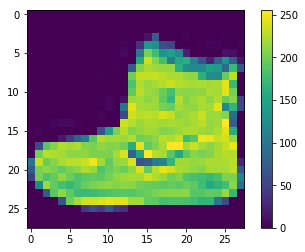

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#### Pixel values fall in the range of 0 to 255
  -  We are going to scale the value into the range of 0 to 255 before feeding the neural network
  - Both the training and testing data set should be trained the same way


In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Plotting the images after preprocessing with their labels

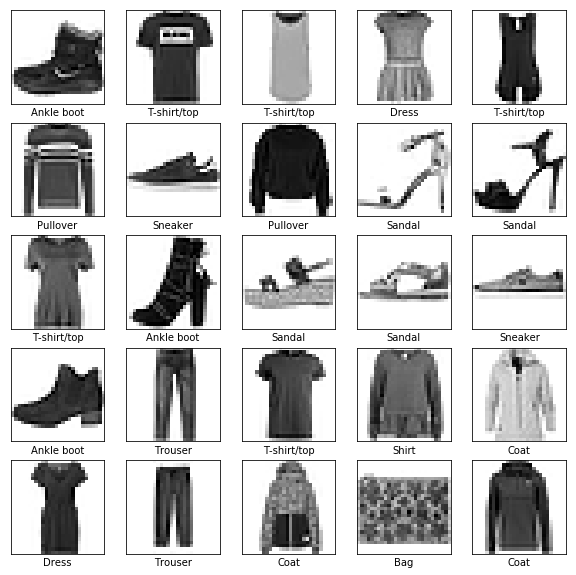

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Setup of the Layer


*  Basic Building Block of a Neural Network is *layers*.
*  Layers extract representations from the data fed into them.
*  Most deep learning consisits of chaining together simple layers
*  Under keras module, we use tf.keras.Sequential
*  tf.keras.layers.Dense have parameters that are learned during training

# More about the Instructions

* layers.Flatten(input_shape=(28, 28)) ------- This layer converts the 2d array of 28\*28 to 1d array of   28\*28=  784 pixels. Think of unstacking the rows to a single array
* layers.Dense(128, activation=tf.nn.relu)----- There are two densel layers. These are densely connected layers/fully-connected layers. 
    - The first layer has 128 nodes(neurons)
    - The last layer has 10-node-softmax-layers
    - The output of the last one returns a probablity of scores that sum to 1
    - Each node contains a score that indicates the probablity that the current image belongs to one of the 10 classes.

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(128, activation=tf.nn.relu),
    
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


# Compile the Model
- The parameters we add during model compile are:
  - Loss Function - Measure of how accurate our model is during the training session. We use this so that our model steers towards the right direction
  -  Optimizer - This is how the model is updated based on the data it sees and its loss function
  - Metrics - Used to Monitor the training and testing steps. The following uses accuracy, the fraction of the image that are correctly classified.

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model
### The steps that go into the training are as follows
- Feed the training datta to the model i.e train_images and train_labels.
- The model learns to associate the images and labels.
- Then we ask the model to make the prediction.

In [19]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2323 - acc: 0.9132
Epoch 2/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2244 - acc: 0.9168
Epoch 3/50
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2167 - acc: 0.9197
Epoch 4/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2118 - acc: 0.9198
Epoch 5/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2053 - acc: 0.9232
Epoch 6/50
60000/60000 [==============================] - 6s 107us/sample - loss: 0.1990 - acc: 0.9251
Epoch 7/50
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1930 - acc: 0.9271
Epoch 8/50
60000/60000 [==============================] - 6s 107us/sample - loss: 0.1879 - acc: 0.9285
Epoch 9/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1839 - acc: 0.9312
Epoch 10/50
60000/60000 [==============================] - 6s 105us/sampl

# Evaluate Accuracy
- After the model is trained, we evaluate the model by loss and accuracy of the model.
- For this we have Loss and Accuracy parameter

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print("---------------------------")
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.5239 - acc: 0.8857
Test Loss: 0.5238592487096787
---------------------------
Test accuracy: 0.8857


We get accuracy of 88%

# Make Predictions with the model

In [0]:
predictions = model.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

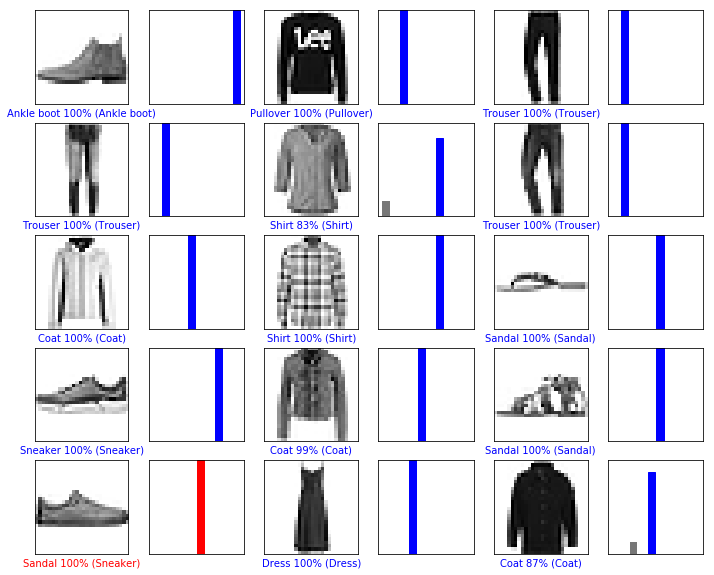

In [30]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()